## Group no. 5 : Rachana choudhary 18510063   Nitish goyal 18510053

## Focoult pendulum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math

In [2]:
def rhs1(tk,Ik):
    xk,vxk,yk,vyk=Ik
    return vxk, 2*omega*np.sin(lemda)*vyk-((omega0)**2)*xk, vyk, -2*omega*np.sin(lemda)*vxk-((omega0)**2)*yk

In [3]:
def leapfrog(rhs, I0, t):
    dt = t[1] - t[0]
    
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    vx = np.zeros(len(t))
    vy = np.zeros(len(t))
    vxhalf = np.zeros(len(t))
    vyhalf = np.zeros(len(t))
    
    #initial conditions (as provided)
    x[0], vx[0], y[0], vy[0]= I0
    
    for k in range(len(t)-1):       
        dydt = rhs(t[k], [x[k], vx[k], y[k], vy[k]])
        axk = dydt[1]
        ayk = dydt[3]
        vxhalf[k] = vx[k] + 0.5 * dt * axk
        vyhalf[k] = vy[k] + 0.5 *dt* ayk        
        x[k+1] = x[k] + dt*vxhalf[k]
        y[k+1] = y[k] + dt*vyhalf[k]
        dydt = rhs(t[k], [x[k+1], vx[k], y[k+1], vy[k]])
        akxplus1 = dydt[1]
        akyplus1 = dydt[3]
        vx[k+1] = vxhalf[k] + 0.5*dt*akxplus1
        vy[k+1] = vyhalf[k] + 0.5*dt*akyplus1
    return x[::10], vx[::10], y[::10], vy[::10], t[::10]

In [5]:
'''def my_leap(rhs,I0,hrs):   # hrs should be integer
    Ii=I0
    xa=np.array([I0[0]])
    ya=np.array([I0[2]])
    tf=np.array([0])
    
    for i in range(0,hrs):
        t=np.linspace(3600*i,3600*(i+1),720000)
        sol = leapfrog(rhs, Ii, t)
        Ii = sol[0][-1], sol[1][-1], sol[2][-1], sol[3][-1]
        xa = np.concatenate((sol[0][::10],xa),axis=0)
        ya = np.concatenate((sol[2][::10],ya),axis=0)
        tf = np.concatenate((tf,t[::10]),axis=0)
    return xa, ya, tf'''

'def my_leap(rhs,I0,hrs):   # hrs should be integer\n    Ii=I0\n    xa=np.array([I0[0]])\n    ya=np.array([I0[2]])\n    tf=np.array([0])\n    \n    for i in range(0,hrs):\n        t=np.linspace(3600*i,3600*(i+1),720000)\n        sol = leapfrog(rhs, Ii, t)\n        Ii = sol[0][-1], sol[1][-1], sol[2][-1], sol[3][-1]\n        xa = np.concatenate((sol[0][::10],xa),axis=0)\n        ya = np.concatenate((sol[2][::10],ya),axis=0)\n        tf = np.concatenate((tf,t[::10]),axis=0)\n    return xa, ya, tf'

In [37]:
m=45        #(kg) mass of the bob

R=0.11      #radius of bob(m)

lemda=.881      #lattitude angle of ahemdabad(rad)

r=6.371397*(10**6)   #(earth's radius+laboratry altitude)

l=7.98       # length of the wire(m)

g=9.804       # gravitational acceleration (m/sec**2)

omega=7.2921150*(10**-5)    #earth anguler rotation speed (rad/sec)

tau=np.sqrt(l/g)

omega0=(2*np.pi)*np.sqrt(g/l)

mu_viscosity=1.983*10**(-5)   # the dynamic viscosity of the air(N.s.m**(-2))

ro=1.189                      # density of the air(kg/m**3)

CD=2                   # Quadratic Drag coefficient

RO=4*np.pi*(R**3)/3           # RO=m/v

I0=[1,0,0,0]                  # Initial condition


## Pendulum's movement in 2 hours

In [26]:

t=np.linspace(0,7200,720000)
sol1=leapfrog(rhs1, I0, t)


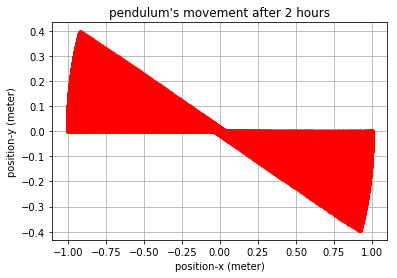

In [27]:
plt.plot(sol1[0],sol1[2],'.r')
plt.figure(1)
plt.xlabel('position-x (meter)')
plt.ylabel('position-y (meter)')
plt.title("pendulum's movement after 2 hours")
plt.grid()
plt.show()

## Pendulum's movement in 24 hours

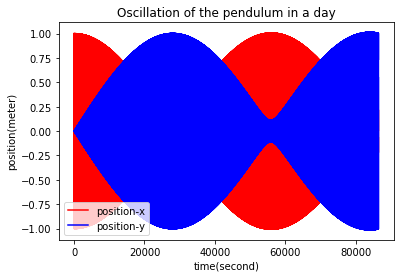

In [28]:
t=np.linspace(0,86400,8640000)
sol1=leapfrog(rhs1, I0, t)
plt.figure(2)
plt.plot(sol1[4],sol1[0],'r',label='position-x')
plt.plot(sol1[4],sol1[2],'b',label='position-y')
plt.xlabel('time(second)')
plt.ylabel('position(meter)')
plt.legend()
plt.title('Oscillation of the pendulum in a day' )
plt.show()

### The bob will undergo two diﬀerent types of air friction. 

###  [1]  The ﬁrst  is called Stokes’ Drag Fd (inN), a frictional force that is proportional to the           velocity of the bob: Fd = 6π µRva 

In [33]:
def rhs2(tk,Ik):
    xk,vxk,yk,vyk=Ik
    f1=6*np.pi * mu_viscosity / m
    f2=6*np.pi * mu_viscosity / m
    return vxk, 2*omega*np.sin(lemda)*vyk-f1-((omega0)**2)*xk, vyk, -2*omega*np.sin(lemda)*vxk-f2-((omega0)**2)*yk

### The second type is  air friction acting on the pendulum’s bob is called quadratic drag FD.

In [34]:
def rhs3(tk,Ik):
    xk,vxk,yk,vyk=Ik
    f3=1/2*RO*CD*np.pi*(R**2)*abs(vxk)*vxk/m
    f4=1/2*RO*CD*np.pi*(R**2)*abs(vyk)*vyk/m
    return vxk, 2*omega*np.sin(lemda)*vyk-f3-((omega0)**2)*xk, vyk, -2*omega*np.sin(lemda)*vxk-f4-((omega0)**2)*yk  

###  Ideal, Linear friction, Quadratic friction

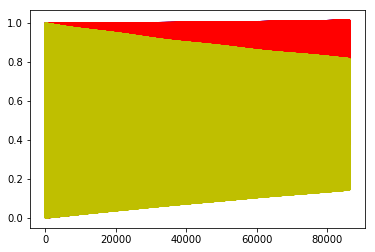

In [35]:
t=np.linspace(0,86400,8640000)
plt.plot(sol1[4],np.sqrt((sol1[0])**2+(sol1[2])**2),'b', label='ideal' )
x1,vx1,y1,vy1,t1=leapfrog(rhs2,I0,t)
plt.plot(t1,np.sqrt(x1**2+y1**2),'g', label='linear friction')
x2,vx2,y2,vy2,t2=leapfrog(rhs3,I0,t)
plt.plot(t2,np.sqrt(x2**2+y2**2),'y', label='quadratic friction')

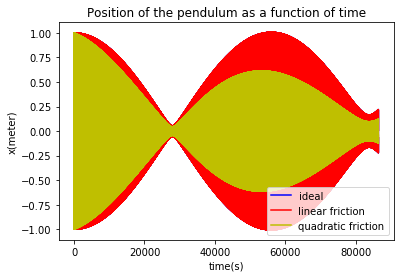

In [42]:
plt.plot(sol1[4],sol1[0],'b', label='ideal' )
plt.plot(t1,x1,'r', label='linear friction')
plt.plot(t2,x2,'y', label='quadratic friction')


#plt.plot(sol1[4],sol1[0],'b',label='ideal')

#plt.plot(sol2[4],sol2[0],'r',label='linear friction')

#plt.plot(sol3[4],sol3[0],'y',label='quadratic friction')

plt.xlabel('time(s)')
plt.ylabel('x(meter)')
plt.legend()
plt.title("Position of the pendulum as a function of time")
plt.show()

In [53]:
x3,vx3,y3,vy3,t3=leapfrog(rhs1,I0,t)




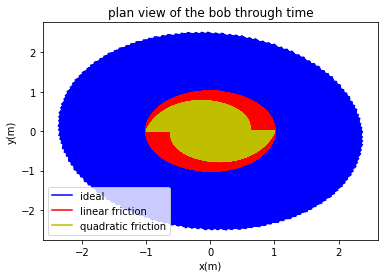

In [56]:
plt.plot(x3[::2],y3[::2],'b', label='ideal' )
plt.plot(x1[::10],y1[::10],'r', label='linear friction')
plt.plot(x2[::10],y2[::10],'y', label='quadratic friction')

plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.legend()
plt.title('plan view of the bob through time' )
plt.show()